* RegEX
* RegEX_replace
* rlike
* Date Functions,next_day,curent_day,current_timestamp, nextday, lastday, day_of_week, day_of_month, day_of_year, week_of_year, month_between, dateAdd, date_sub, monthAdd, date_diff, date_trunc, date_format
* NULL Functions- isnull, isnan,nanvl
* Elemnt_at, Size, Array, Array_max, Array_min, Array_distint, array_repeat, slice, Array_position, array_remove, sort_array, array_contains, array_union,array_except,array_intersect, array_join,arrays_zip, create_map, map_from_arrays, map_values,map_keys


In [1]:
import findspark
findspark.init()
import pandas as pd
import pyspark
from pyspark.sql.functions import udf,col,length,expr,lit,lower,sumDistinct,sum,round,count,countDistinct,max,min,avg
from pyspark.sql.types import IntegerType
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Train_hard").getOrCreate()
from pyspark.sql.window import Window
from pyspark.sql.window import *
from pyspark.sql.functions import *

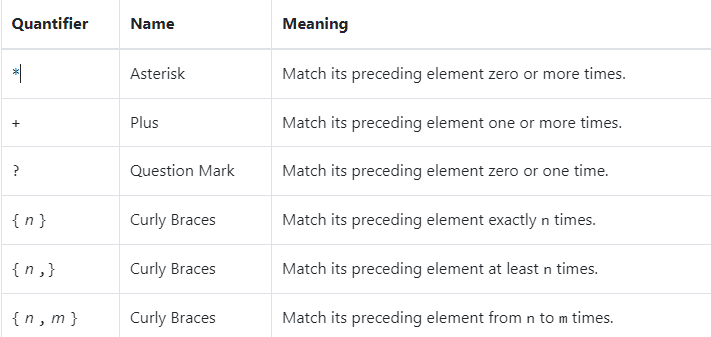


In [10]:
df=spark.createDataFrame([("11ss1 ab",)],("str",))
df.show()

+--------+
|     str|
+--------+
|11ss1 ab|
+--------+



In [13]:
df.select(df.str,regexp_extract(df.str,"(\d)",1).alias("Regex_exprssion")).show() ## this 1 will extract frst group

+--------+---------------+
|     str|Regex_exprssion|
+--------+---------------+
|11ss1 ab|              1|
+--------+---------------+



In [17]:
df.select(df.str,regexp_extract(df.str,"(\d+)",1).alias("Regex_exprssion")).show() ## this 1 will extract frst group

+--------+---------------+
|     str|Regex_exprssion|
+--------+---------------+
|11ss1 ab|             11|
+--------+---------------+



In [18]:
df.select(df.str,regexp_extract(df.str,"(\d+)(\w+)",1).alias("Regex_exprssion")).show()

+--------+---------------+
|     str|Regex_exprssion|
+--------+---------------+
|11ss1 ab|             11|
+--------+---------------+



In [19]:
df.select(df.str,regexp_extract(df.str,"(\d+)(\w+)",2).alias("Regex_exprssion")).show() # 2 for acessing second group

+--------+---------------+
|     str|Regex_exprssion|
+--------+---------------+
|11ss1 ab|            ss1|
+--------+---------------+



In [20]:
df.select(df.str,regexp_extract(df.str,"(\d+)(\w+)(\s)",3).alias("Regex_exprssion")).show() # 3 for acessing third group which
                                                                                        # is a space

+--------+---------------+
|     str|Regex_exprssion|
+--------+---------------+
|11ss1 ab|               |
+--------+---------------+



In [25]:
df.select(df.str,regexp_extract(df.str,"(\d+)(\w+)(\s)([a-z]*)",4).alias("Regex_exprssion")).show()

+--------+---------------+
|     str|Regex_exprssion|
+--------+---------------+
|11ss1 ab|             ab|
+--------+---------------+



### Regex_replace-- replace a string where it finds a match

In [27]:
df.select(df.str,regexp_replace(df.str,"(\d)","X").alias("Regex_exprssion")).show()

+--------+---------------+
|     str|Regex_exprssion|
+--------+---------------+
|11ss1 ab|       XXssX ab|
+--------+---------------+



### if a adress ends with rd make it road if st make it street

In [2]:
addr=[(2625,"Indian school rd","Phoenix"),(1234,"Thomas St","Newyork")]
schema=["id","adress","city"]
df=spark.createDataFrame(data=addr,schema=schema)
df.show()

+----+----------------+-------+
|  id|          adress|   city|
+----+----------------+-------+
|2625|Indian school rd|Phoenix|
|1234|       Thomas St|Newyork|
+----+----------------+-------+



In [54]:
df1=df.withColumn("New_rd",when(substring_index(df.adress," ",-1)=="rd","Road").\
             when(substring_index(df.adress," ",-1)=="St","Street"))
df1.show()

+----+----------------+-------+------+
|  id|          adress|   city|New_rd|
+----+----------------+-------+------+
|2625|Indian school rd|Phoenix|  Road|
|1234|       Thomas St|Newyork|Street|
+----+----------------+-------+------+



In [56]:
df1.withColumn("New",when(substring_index(df1.adress," ",-1)=="rd",overlay(df1.adress,df1.New_rd,instr(df1.adress,"rd"))).\
                     when(substring_index(df1.adress," ",-1)=="St",overlay(df1.adress,df1.New_rd,instr(df.adress,"St")))).show()

+----+----------------+-------+------+------------------+
|  id|          adress|   city|New_rd|               New|
+----+----------------+-------+------+------------------+
|2625|Indian school rd|Phoenix|  Road|Indian school Road|
|1234|       Thomas St|Newyork|Street|     Thomas Street|
+----+----------------+-------+------+------------------+



## Second approach

In [60]:
df.withColumn("New_addr",when(df.adress.endswith("rd"),regexp_replace(df.adress,"rd","Road")).\
                         when(df.adress.endswith("St"),regexp_replace(df.adress,"St","Street")).\
                         otherwise(df.adress)).show()

+----+----------------+-------+------------------+
|  id|          adress|   city|          New_addr|
+----+----------------+-------+------------------+
|2625|Indian school rd|Phoenix|Indian school Road|
|1234|       Thomas St|Newyork|     Thomas Street|
+----+----------------+-------+------------------+



### Rlike

In [3]:
df=spark.createDataFrame([("11ss1 ab",)],("str",))
df.show()

+--------+
|     str|
+--------+
|11ss1 ab|
+--------+



#### Check the numbers pattern

In [5]:
df.select(col("*"),df.str.rlike("(\d)").alias("rlike")).show()

+--------+-----+
|     str|rlike|
+--------+-----+
|11ss1 ab| true|
+--------+-----+



#### Check if there is any space

In [6]:
df.select(col("*"),df.str.rlike("(\s)").alias("rlike")).show()

+--------+-----+
|     str|rlike|
+--------+-----+
|11ss1 ab| true|
+--------+-----+



### Date functions

In [3]:
df=spark.read.load('orders/part-00000',format="csv",schema='order_id int,order_date timestamp,order_customer_id int, \
                   order_status string')
df.show(5)

+--------+-------------------+-----------------+---------------+
|order_id|         order_date|order_customer_id|   order_status|
+--------+-------------------+-----------------+---------------+
|       1|2013-07-25 00:00:00|            11599|         CLOSED|
|       2|2013-07-25 00:00:00|              256|PENDING_PAYMENT|
|       3|2013-07-25 00:00:00|            12111|       COMPLETE|
|       4|2013-07-25 00:00:00|             8827|         CLOSED|
|       5|2013-07-25 00:00:00|            11318|       COMPLETE|
+--------+-------------------+-----------------+---------------+
only showing top 5 rows



In [4]:
df_new=df.withColumn("new_order_date",date_add(df.order_date,50))
df_new.show(5)

+--------+-------------------+-----------------+---------------+--------------+
|order_id|         order_date|order_customer_id|   order_status|new_order_date|
+--------+-------------------+-----------------+---------------+--------------+
|       1|2013-07-25 00:00:00|            11599|         CLOSED|    2013-09-13|
|       2|2013-07-25 00:00:00|              256|PENDING_PAYMENT|    2013-09-13|
|       3|2013-07-25 00:00:00|            12111|       COMPLETE|    2013-09-13|
|       4|2013-07-25 00:00:00|             8827|         CLOSED|    2013-09-13|
|       5|2013-07-25 00:00:00|            11318|       COMPLETE|    2013-09-13|
+--------+-------------------+-----------------+---------------+--------------+
only showing top 5 rows



### current_date

In [11]:
df.select(current_date()).show(5)

+--------------+
|current_date()|
+--------------+
|    2022-11-30|
|    2022-11-30|
|    2022-11-30|
|    2022-11-30|
|    2022-11-30|
+--------------+
only showing top 5 rows



#### current_timestamp

In [15]:
df.select(current_timestamp()).show(truncate=False)

+--------------------------+
|current_timestamp()       |
+--------------------------+
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
|2022-11-30 23:25:51.030835|
+--------------------------+
only showing top 20 rows



## Next_day
* Using next day and passing quantifier "Fri" we are getting next friday date

In [30]:
df.select(df.order_date,next_day(df.order_date,"Fri").alias("Next_Fri")).distinct().show(5)

+-------------------+----------+
|         order_date|  Next_Fri|
+-------------------+----------+
|2013-09-01 00:00:00|2013-09-06|
|2013-09-24 00:00:00|2013-09-27|
|2013-11-19 00:00:00|2013-11-22|
|2014-05-04 00:00:00|2014-05-09|
|2014-05-21 00:00:00|2014-05-23|
+-------------------+----------+
only showing top 5 rows



### Last_day
* last date of the month

In [31]:
df.select(df.order_date,last_day(df.order_date).alias("Last_day")).distinct().show(5)

+-------------------+----------+
|         order_date|  Last_day|
+-------------------+----------+
|2014-04-03 00:00:00|2014-04-30|
|2014-07-04 00:00:00|2014-07-31|
|2014-03-26 00:00:00|2014-03-31|
|2014-07-18 00:00:00|2014-07-31|
|2013-07-26 00:00:00|2013-07-31|
+-------------------+----------+
only showing top 5 rows



### day of week
* print the day of the week where 1 is for Monday and 7 is for Sunday.

In [32]:
df.select(df.order_date,dayofweek(df.order_date).alias("DayOfWeek")).distinct().show(5)

+-------------------+---------+
|         order_date|DayOfWeek|
+-------------------+---------+
|2013-11-02 00:00:00|        7|
|2014-01-15 00:00:00|        4|
|2013-08-05 00:00:00|        2|
|2013-09-27 00:00:00|        6|
|2013-10-20 00:00:00|        1|
+-------------------+---------+
only showing top 5 rows



### Day of month

In [34]:
df.select(df.order_date,dayofmonth(df.order_date).alias("DayOfMonth")).distinct().show(5)

+-------------------+----------+
|         order_date|DayOfMonth|
+-------------------+----------+
|2013-09-09 00:00:00|         9|
|2013-11-03 00:00:00|         3|
|2014-02-22 00:00:00|        22|
|2014-02-24 00:00:00|        24|
|2013-12-24 00:00:00|        24|
+-------------------+----------+
only showing top 5 rows



### day of year

In [35]:
df.select(df.order_date,dayofyear(df.order_date).alias("DayOfYear")).distinct().show(5)

+-------------------+---------+
|         order_date|DayOfYear|
+-------------------+---------+
|2013-09-02 00:00:00|      245|
|2013-10-05 00:00:00|      278|
|2013-10-31 00:00:00|      304|
|2014-03-01 00:00:00|       60|
|2013-10-02 00:00:00|      275|
+-------------------+---------+
only showing top 5 rows



### week of the year

In [36]:
df.select(df.order_date,weekofyear(df.order_date).alias("WeekOfYear")).distinct().show(5)

+-------------------+----------+
|         order_date|WeekOfYear|
+-------------------+----------+
|2013-10-30 00:00:00|        44|
|2014-04-09 00:00:00|        15|
|2014-05-29 00:00:00|        22|
|2013-10-17 00:00:00|        42|
|2013-07-25 00:00:00|        30|
+-------------------+----------+
only showing top 5 rows



## month_between()

In [5]:
df_new.show(2)

+--------+-------------------+-----------------+---------------+--------------+
|order_id|         order_date|order_customer_id|   order_status|new_order_date|
+--------+-------------------+-----------------+---------------+--------------+
|       1|2013-07-25 00:00:00|            11599|         CLOSED|    2013-09-13|
|       2|2013-07-25 00:00:00|              256|PENDING_PAYMENT|    2013-09-13|
+--------+-------------------+-----------------+---------------+--------------+
only showing top 2 rows



### By default
* roundoff is set to 8 digits

In [8]:
df_new.withColumn("Month_between",months_between(df_new.new_order_date,df_new.order_date)).show(5)

+--------+-------------------+-----------------+---------------+--------------+-------------+
|order_id|         order_date|order_customer_id|   order_status|new_order_date|Month_between|
+--------+-------------------+-----------------+---------------+--------------+-------------+
|       1|2013-07-25 00:00:00|            11599|         CLOSED|    2013-09-13|   1.61290323|
|       2|2013-07-25 00:00:00|              256|PENDING_PAYMENT|    2013-09-13|   1.61290323|
|       3|2013-07-25 00:00:00|            12111|       COMPLETE|    2013-09-13|   1.61290323|
|       4|2013-07-25 00:00:00|             8827|         CLOSED|    2013-09-13|   1.61290323|
|       5|2013-07-25 00:00:00|            11318|       COMPLETE|    2013-09-13|   1.61290323|
+--------+-------------------+-----------------+---------------+--------------+-------------+
only showing top 5 rows



In [9]:
df_new.withColumn("Month_between",months_between(df_new.new_order_date,df_new.order_date,roundOff=False)).show(5)

+--------+-------------------+-----------------+---------------+--------------+------------------+
|order_id|         order_date|order_customer_id|   order_status|new_order_date|     Month_between|
+--------+-------------------+-----------------+---------------+--------------+------------------+
|       1|2013-07-25 00:00:00|            11599|         CLOSED|    2013-09-13|1.6129032258064515|
|       2|2013-07-25 00:00:00|              256|PENDING_PAYMENT|    2013-09-13|1.6129032258064515|
|       3|2013-07-25 00:00:00|            12111|       COMPLETE|    2013-09-13|1.6129032258064515|
|       4|2013-07-25 00:00:00|             8827|         CLOSED|    2013-09-13|1.6129032258064515|
|       5|2013-07-25 00:00:00|            11318|       COMPLETE|    2013-09-13|1.6129032258064515|
+--------+-------------------+-----------------+---------------+--------------+------------------+
only showing top 5 rows



### Date _add
* Adding 5 days to current date

In [11]:
df_new.select(df_new.new_order_date,date_add(df_new.new_order_date,5)).distinct().show(5)

+--------------+---------------------------+
|new_order_date|date_add(new_order_date, 5)|
+--------------+---------------------------+
|    2013-09-22|                 2013-09-27|
|    2014-02-04|                 2014-02-09|
|    2014-03-02|                 2014-03-07|
|    2014-08-15|                 2014-08-20|
|    2014-01-11|                 2014-01-16|
+--------------+---------------------------+
only showing top 5 rows



### Add_month

In [5]:
df_new.select(df_new.new_order_date,add_months(df_new.new_order_date,3)).distinct().show(5)

+--------------+-----------------------------+
|new_order_date|add_months(new_order_date, 3)|
+--------------+-----------------------------+
|    2014-03-10|                   2014-06-10|
|    2014-05-24|                   2014-08-24|
|    2014-06-23|                   2014-09-23|
|    2013-12-11|                   2014-03-11|
|    2014-05-06|                   2014-08-06|
+--------------+-----------------------------+
only showing top 5 rows



### DateDiff

In [6]:
df_new.select(df_new.new_order_date,df_new.order_date,datediff(df_new.new_order_date,df_new.order_date)).distinct().show(5)

+--------------+-------------------+------------------------------------+
|new_order_date|         order_date|datediff(new_order_date, order_date)|
+--------------+-------------------+------------------------------------+
|    2014-01-12|2013-11-23 00:00:00|                                  50|
|    2013-11-10|2013-09-21 00:00:00|                                  50|
|    2014-06-25|2014-05-06 00:00:00|                                  50|
|    2014-09-08|2014-07-20 00:00:00|                                  50|
|    2014-08-06|2014-06-17 00:00:00|                                  50|
+--------------+-------------------+------------------------------------+
only showing top 5 rows



### Date_truc
* Truncate date we can pass 'yyyy' as in example below truncated to 2013
* mm trucated to same month* we can also do in "dd" ,"hours- hh" "minute--mm" , "scond-ss"

In [9]:
df.withColumn("order_year",date_trunc("yyyy",df.order_date).alias("Date_diff")).distinct().show(10)

+--------+-------------------+-----------------+---------------+-------------------+
|order_id|         order_date|order_customer_id|   order_status|         order_year|
+--------+-------------------+-----------------+---------------+-------------------+
|     930|2013-07-30 00:00:00|              954|PENDING_PAYMENT|2013-01-01 00:00:00|
|    1069|2013-07-30 00:00:00|             4683|SUSPECTED_FRAUD|2013-01-01 00:00:00|
|    1099|2013-07-31 00:00:00|             2653|       COMPLETE|2013-01-01 00:00:00|
|    1285|2013-07-31 00:00:00|             2543|     PROCESSING|2013-01-01 00:00:00|
|    1429|2013-08-01 00:00:00|             5109|        ON_HOLD|2013-01-01 00:00:00|
|    1448|2013-08-01 00:00:00|             1454|        PENDING|2013-01-01 00:00:00|
|    1674|2013-08-02 00:00:00|             4364|       COMPLETE|2013-01-01 00:00:00|
|    1820|2013-08-03 00:00:00|              590|       COMPLETE|2013-01-01 00:00:00|
|    1910|2013-08-04 00:00:00|             2002|     PROCESSING|2

In [10]:
df.withColumn("order_year",date_trunc("mm",df.order_date).alias("Date_diff")).distinct().show(10)

+--------+-------------------+-----------------+---------------+-------------------+
|order_id|         order_date|order_customer_id|   order_status|         order_year|
+--------+-------------------+-----------------+---------------+-------------------+
|     106|2013-07-26 00:00:00|              395|     PROCESSING|2013-07-01 00:00:00|
|     343|2013-07-26 00:00:00|            10952|       COMPLETE|2013-07-01 00:00:00|
|     402|2013-07-27 00:00:00|             9547|PENDING_PAYMENT|2013-07-01 00:00:00|
|     572|2013-07-28 00:00:00|             6691|        PENDING|2013-07-01 00:00:00|
|     835|2013-07-29 00:00:00|            10640|       COMPLETE|2013-07-01 00:00:00|
|    1690|2013-08-02 00:00:00|             7166|PENDING_PAYMENT|2013-08-01 00:00:00|
|    1717|2013-08-02 00:00:00|               51|     PROCESSING|2013-08-01 00:00:00|
|    1807|2013-08-03 00:00:00|             2847|     PROCESSING|2013-08-01 00:00:00|
|    2069|2013-08-05 00:00:00|             1466|         CLOSED|2

### date_format-- Convet a date/timestamp/string to a value of string in the format specified by date

In [13]:
df1=df.withColumn("New_order_date",date_format(df.order_date,"yyyy/mm/dd"))
df1.show(5)

+--------+-------------------+-----------------+---------------+--------------+
|order_id|         order_date|order_customer_id|   order_status|New_order_date|
+--------+-------------------+-----------------+---------------+--------------+
|       1|2013-07-25 00:00:00|            11599|         CLOSED|    2013/00/25|
|       2|2013-07-25 00:00:00|              256|PENDING_PAYMENT|    2013/00/25|
|       3|2013-07-25 00:00:00|            12111|       COMPLETE|    2013/00/25|
|       4|2013-07-25 00:00:00|             8827|         CLOSED|    2013/00/25|
|       5|2013-07-25 00:00:00|            11318|       COMPLETE|    2013/00/25|
+--------+-------------------+-----------------+---------------+--------------+
only showing top 5 rows



In [15]:
df1.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- order_date: timestamp (nullable = true)
 |-- order_customer_id: integer (nullable = true)
 |-- order_status: string (nullable = true)
 |-- New_order_date: string (nullable = true)



## to_timestamp
* Convert a string into time stamp provided data should be in "yyyy/mm/dd" format

In [19]:
df1=df1.select(col("*"),to_timestamp(df1.New_order_date))
df1.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- order_date: timestamp (nullable = true)
 |-- order_customer_id: integer (nullable = true)
 |-- order_status: string (nullable = true)
 |-- New_order_date: string (nullable = true)
 |-- to_timestamp(New_order_date): timestamp (nullable = true)



### to_date
* Same as to_timestamp

In [21]:
df1=df.withColumn("New_order_date",date_format(df.order_date,"yyyy/mm/dd"))
df1.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- order_date: timestamp (nullable = true)
 |-- order_customer_id: integer (nullable = true)
 |-- order_status: string (nullable = true)
 |-- New_order_date: string (nullable = true)



In [22]:
df1=df1.select(col("*"),to_date(df1.New_order_date,"yyyy/mm/dd"))
df1.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- order_date: timestamp (nullable = true)
 |-- order_customer_id: integer (nullable = true)
 |-- order_status: string (nullable = true)
 |-- New_order_date: string (nullable = true)
 |-- to_date(New_order_date, yyyy/mm/dd): date (nullable = true)



### NULL Functions

In [2]:
df=spark.createDataFrame([("Robert",1,None,114.0),("John",None,2577,float('nan'))],("Name","ID","Phone","StAdd"))
df.show()

+------+----+-----+-----+
|  Name|  ID|Phone|StAdd|
+------+----+-----+-----+
|Robert|   1| null|114.0|
|  John|null| 2577|  NaN|
+------+----+-----+-----+



### isnull()

In [3]:
df.select(df.Phone,isnull(df.Phone)).show()

+-----+---------------+
|Phone|(Phone IS NULL)|
+-----+---------------+
| null|           true|
| 2577|          false|
+-----+---------------+



### isnan()-- Not a number

In [4]:
df.select(df.StAdd,isnan(df.StAdd)).show()

+-----+------------+
|StAdd|isnan(StAdd)|
+-----+------------+
|114.0|       false|
|  NaN|        true|
+-----+------------+



### NanVL()- Return frst nonmissing value

In [7]:
df.select(col("*"),nanvl(df.StAdd,df.Phone)).show()

+------+----+-----+-----+-------------------+
|  Name|  ID|Phone|StAdd|nanvl(StAdd, Phone)|
+------+----+-----+-----+-------------------+
|Robert|   1| null|114.0|              114.0|
|  John|null| 2577|  NaN|             2577.0|
+------+----+-----+-----+-------------------+



### Coalesce-- Return the first column that is not null

In [10]:
df.select(df.Phone,df.StAdd,coalesce(df.Phone,df.StAdd)).show()

+-----+-----+----------------------+
|Phone|StAdd|coalesce(Phone, StAdd)|
+-----+-----+----------------------+
| null|114.0|                 114.0|
| 2577|  NaN|                2577.0|
+-----+-----+----------------------+



In [11]:
df.select(df.Phone,df.StAdd,coalesce(df.StAdd,df.Phone)).show()

+-----+-----+----------------------+
|Phone|StAdd|coalesce(StAdd, Phone)|
+-----+-----+----------------------+
| null|114.0|                 114.0|
| 2577|  NaN|                   NaN|
+-----+-----+----------------------+



### Here-
* we get NaN coz its a Not a number its not a null

## DataFrame Built-in Functions

In [3]:
data=[("Alicia","Joseph",["Java","Scala","Spark"],{"Hair":"Black","Eye":"Brown"}),\
     ("Robert","Gee",["Spark","Java"],{"Hair":"Brown","Eye":None}),\
     ("Mike","Bianca",["CSharp"],{"Hair":"Red","Eye":""}),\
     ("John","Kumar",None,None),\
     ("Jeff","L",["1","2"],{})]
schema=["FirstName","LastName","Languages","Properties"]
emp1=spark.createDataFrame(data,schema)
emp1.show(truncate=False)

+---------+--------+--------------------+-----------------------------+
|FirstName|LastName|Languages           |Properties                   |
+---------+--------+--------------------+-----------------------------+
|Alicia   |Joseph  |[Java, Scala, Spark]|{Eye -> Brown, Hair -> Black}|
|Robert   |Gee     |[Spark, Java]       |{Eye -> null, Hair -> Brown} |
|Mike     |Bianca  |[CSharp]            |{Eye -> , Hair -> Red}       |
|John     |Kumar   |null                |null                         |
|Jeff     |L       |[1, 2]              |{}                           |
+---------+--------+--------------------+-----------------------------+



In [4]:
data=[("Robert",35,40,40),("Ram",31,33,29),("John",95,89,91)]
schema=["Name","Score1","Score2","Score3"]
emp2=spark.createDataFrame(data,schema)
emp2.show()

+------+------+------+------+
|  Name|Score1|Score2|Score3|
+------+------+------+------+
|Robert|    35|    40|    40|
|   Ram|    31|    33|    29|
|  John|    95|    89|    91|
+------+------+------+------+



In [5]:
data=[("John",[10,20,20],[25,11,10]),
      ("Robert",[15,13,55],[5,None,29]),
      ("James",[11,13,45],[5,89,79])]
schema=["Empname","Score_arr1","Score_arr2"]
emp3=spark.createDataFrame(data,schema)
emp3.show()

+-------+------------+-------------+
|Empname|  Score_arr1|   Score_arr2|
+-------+------------+-------------+
|   John|[10, 20, 20]| [25, 11, 10]|
| Robert|[15, 13, 55]|[5, null, 29]|
|  James|[11, 13, 45]|  [5, 89, 79]|
+-------+------------+-------------+



In [6]:
df=spark.sql("Select array(struct(1,'a'),struct(2,'b')) as data")
df.printSchema()

root
 |-- data: array (nullable = false)
 |    |-- element: struct (containsNull = false)
 |    |    |-- col1: integer (nullable = false)
 |    |    |-- col2: string (nullable = false)



In [7]:
df.show()

+----------------+
|            data|
+----------------+
|[{1, a}, {2, b}]|
+----------------+



#### SIZE

In [20]:
emp1.show(truncate=False)

+---------+--------+--------------------+-----------------------------+
|FirstName|LastName|Languages           |Properties                   |
+---------+--------+--------------------+-----------------------------+
|Alicia   |Joseph  |[Java, Scala, Spark]|{Eye -> Brown, Hair -> Black}|
|Robert   |Gee     |[Spark, Java]       |{Eye -> null, Hair -> Brown} |
|Mike     |Bianca  |[CSharp]            |{Eye -> , Hair -> Red}       |
|John     |Kumar   |null                |null                         |
|Jeff     |L       |[1, 2]              |{}                           |
+---------+--------+--------------------+-----------------------------+



In [21]:
emp1.select(size("Languages"),size('Properties')).show()
# Since [Java, Scala, Spark] array total is 3 so 3 is aagined
# For NUll -1 is assigned
# For Jeff in Properties it have {} so value is 0

+---------------+----------------+
|size(Languages)|size(Properties)|
+---------------+----------------+
|              3|               2|
|              2|               2|
|              1|               2|
|             -1|              -1|
|              2|               0|
+---------------+----------------+



### element_at(col,extraction)
* Return element of array at given index in extraction if col is array
* Return value for the given key in extraction if col is map

In [23]:
emp1.select(element_at("Languages",1),element_at('Properties',"Eye")).show()
# here we use 1 coz we want to select frst index i.e java abd key "Eye" from the properties i.e brown

+------------------------+---------------------------+
|element_at(Languages, 1)|element_at(Properties, Eye)|
+------------------------+---------------------------+
|                    Java|                      Brown|
|                   Spark|                       null|
|                  CSharp|                           |
|                    null|                       null|
|                       1|                       null|
+------------------------+---------------------------+



### Array()

In [24]:
emp2.show()

+------+------+------+------+
|  Name|Score1|Score2|Score3|
+------+------+------+------+
|Robert|    35|    40|    40|
|   Ram|    31|    33|    29|
|  John|    95|    89|    91|
+------+------+------+------+



In [27]:
emp2.select(col("*"),array("Score1","Score2","Score3")).show()

+------+------+------+------+-----------------------------+
|  Name|Score1|Score2|Score3|array(Score1, Score2, Score3)|
+------+------+------+------+-----------------------------+
|Robert|    35|    40|    40|                 [35, 40, 40]|
|   Ram|    31|    33|    29|                 [31, 33, 29]|
|  John|    95|    89|    91|                 [95, 89, 91]|
+------+------+------+------+-----------------------------+



### Array_Max

In [28]:
emp3.show()

+-------+------------+-------------+
|Empname|  Score_arr1|   Score_arr2|
+-------+------------+-------------+
|   John|[10, 20, 20]| [25, 11, 10]|
| Robert|[15, 13, 55]|[5, null, 29]|
|  James|[11, 13, 45]|  [5, 89, 79]|
+-------+------------+-------------+



In [33]:
emp3.select(col("Score_arr1"),col("Score_arr2"),array_max(emp3.Score_arr1).\
            alias("Score_arr1_Max_elemnt"),array_min(emp3.Score_arr2).alias("Score_arr1_min")).show()

+------------+-------------+---------------------+--------------+
|  Score_arr1|   Score_arr2|Score_arr1_Max_elemnt|Score_arr1_min|
+------------+-------------+---------------------+--------------+
|[10, 20, 20]| [25, 11, 10]|                   20|            10|
|[15, 13, 55]|[5, null, 29]|                   55|             5|
|[11, 13, 45]|  [5, 89, 79]|                   45|             5|
+------------+-------------+---------------------+--------------+



### Array_distinct()

In [34]:
emp3.select(col("Score_arr1"),col("Score_arr2"),array_distinct(emp3.Score_arr1).\
            alias("Score_arr1_Distinct_elemnt"),array_distinct(emp3.Score_arr2).alias("Score_arr1_Distinct")).show()

+------------+-------------+--------------------------+-------------------+
|  Score_arr1|   Score_arr2|Score_arr1_Distinct_elemnt|Score_arr1_Distinct|
+------------+-------------+--------------------------+-------------------+
|[10, 20, 20]| [25, 11, 10]|                  [10, 20]|       [25, 11, 10]|
|[15, 13, 55]|[5, null, 29]|              [15, 13, 55]|      [5, null, 29]|
|[11, 13, 45]|  [5, 89, 79]|              [11, 13, 45]|        [5, 89, 79]|
+------------+-------------+--------------------------+-------------------+



### Array_repeat()

In [8]:
emp3.show()

+-------+------------+-------------+
|Empname|  Score_arr1|   Score_arr2|
+-------+------------+-------------+
|   John|[10, 20, 20]| [25, 11, 10]|
| Robert|[15, 13, 55]|[5, null, 29]|
|  James|[11, 13, 45]|  [5, 89, 79]|
+-------+------------+-------------+



In [11]:
emp3.select(emp3.Score_arr1,array_repeat(emp3.Score_arr1,3)).show(truncate=False)

+------------+------------------------------------------+
|Score_arr1  |array_repeat(Score_arr1, 3)               |
+------------+------------------------------------------+
|[10, 20, 20]|[[10, 20, 20], [10, 20, 20], [10, 20, 20]]|
|[15, 13, 55]|[[15, 13, 55], [15, 13, 55], [15, 13, 55]]|
|[11, 13, 45]|[[11, 13, 45], [11, 13, 45], [11, 13, 45]]|
+------------+------------------------------------------+



##### Using Flatten

In [13]:
emp3.select(flatten(array_repeat(emp3.Score_arr1,3))).show(truncate=False)

+------------------------------------+
|flatten(array_repeat(Score_arr1, 3))|
+------------------------------------+
|[10, 20, 20, 10, 20, 20, 10, 20, 20]|
|[15, 13, 55, 15, 13, 55, 15, 13, 55]|
|[11, 13, 45, 11, 13, 45, 11, 13, 45]|
+------------------------------------+



#### Using array_distinct

In [14]:
emp3.select(array_distinct(flatten(array_repeat(emp3.Score_arr1,3)))).show(truncate=False)

+----------------------------------------------------+
|array_distinct(flatten(array_repeat(Score_arr1, 3)))|
+----------------------------------------------------+
|[10, 20]                                            |
|[15, 13, 55]                                        |
|[11, 13, 45]                                        |
+----------------------------------------------------+



### Slice-- slice array from the provided postions

In [15]:
emp1.show()

+---------+--------+--------------------+--------------------+
|FirstName|LastName|           Languages|          Properties|
+---------+--------+--------------------+--------------------+
|   Alicia|  Joseph|[Java, Scala, Spark]|{Eye -> Brown, Ha...|
|   Robert|     Gee|       [Spark, Java]|{Eye -> null, Hai...|
|     Mike|  Bianca|            [CSharp]|{Eye -> , Hair ->...|
|     John|   Kumar|                null|                null|
|     Jeff|       L|              [1, 2]|                  {}|
+---------+--------+--------------------+--------------------+



* Slice languages from index 1 to 2 i.e Java,Scala likewise

In [17]:
emp1.select(emp1.Languages,slice(emp1.Languages,1,2)).show(truncate=False)

+--------------------+----------------------+
|Languages           |slice(Languages, 1, 2)|
+--------------------+----------------------+
|[Java, Scala, Spark]|[Java, Scala]         |
|[Spark, Java]       |[Spark, Java]         |
|[CSharp]            |[CSharp]              |
|null                |null                  |
|[1, 2]              |[1, 2]                |
+--------------------+----------------------+



## Array_position

In [18]:
emp3.show()

+-------+------------+-------------+
|Empname|  Score_arr1|   Score_arr2|
+-------+------------+-------------+
|   John|[10, 20, 20]| [25, 11, 10]|
| Robert|[15, 13, 55]|[5, null, 29]|
|  James|[11, 13, 45]|  [5, 89, 79]|
+-------+------------+-------------+



In [20]:
emp3.select(col("*"),array_position(emp3.Score_arr1,13)).show()
## pition of eent 13 is 2 on Robert, similarlt 2 in case of James

+-------+------------+-------------+------------------------------+
|Empname|  Score_arr1|   Score_arr2|array_position(Score_arr1, 13)|
+-------+------------+-------------+------------------------------+
|   John|[10, 20, 20]| [25, 11, 10]|                             0|
| Robert|[15, 13, 55]|[5, null, 29]|                             2|
|  James|[11, 13, 45]|  [5, 89, 79]|                             2|
+-------+------------+-------------+------------------------------+



## Array_remove

In [23]:
emp3.select(col("Score_arr1"),array_remove(emp3.Score_arr1,13)).show()

+------------+----------------------------+
|  Score_arr1|array_remove(Score_arr1, 13)|
+------------+----------------------------+
|[10, 20, 20]|                [10, 20, 20]|
|[15, 13, 55]|                    [15, 55]|
|[11, 13, 45]|                    [11, 45]|
+------------+----------------------------+



## Sort_array()

In [37]:
emp3.select(col("Score_arr1"),sort_array(emp3.Score_arr1,asc=False)).show()

+------------+-----------------------------+
|  Score_arr1|sort_array(Score_arr1, false)|
+------------+-----------------------------+
|[10, 20, 20]|                 [20, 20, 10]|
|[15, 13, 55]|                 [55, 15, 13]|
|[11, 13, 45]|                 [45, 13, 11]|
+------------+-----------------------------+



## Array_contains

In [39]:
emp3.select(col("Score_arr2"),array_contains(emp3.Score_arr2,11)).show()

+-------------+------------------------------+
|   Score_arr2|array_contains(Score_arr2, 11)|
+-------------+------------------------------+
| [25, 11, 10]|                          true|
|[5, null, 29]|                          null|
|  [5, 89, 79]|                         false|
+-------------+------------------------------+



## Here
* we get null as there is null value and not the number we are searching for

In [40]:
emp3.select(col("Score_arr2"),array_contains(emp3.Score_arr2,5)).show()

+-------------+-----------------------------+
|   Score_arr2|array_contains(Score_arr2, 5)|
+-------------+-----------------------------+
| [25, 11, 10]|                        false|
|[5, null, 29]|                         true|
|  [5, 89, 79]|                         true|
+-------------+-----------------------------+



## Array_union
* combine the two arrays by removing the duplicates

In [42]:
emp3.select(col("*"),array_union(emp3.Score_arr1,emp3.Score_arr2)).show(truncate=False)

+-------+------------+-------------+-----------------------------------+
|Empname|Score_arr1  |Score_arr2   |array_union(Score_arr1, Score_arr2)|
+-------+------------+-------------+-----------------------------------+
|John   |[10, 20, 20]|[25, 11, 10] |[10, 20, 25, 11]                   |
|Robert |[15, 13, 55]|[5, null, 29]|[15, 13, 55, 5, null, 29]          |
|James  |[11, 13, 45]|[5, 89, 79]  |[11, 13, 45, 5, 89, 79]            |
+-------+------------+-------------+-----------------------------------+



## Array_except

In [43]:
emp3.select(col("*"),array_except(emp3.Score_arr1,emp3.Score_arr2)).show(truncate=False)

+-------+------------+-------------+------------------------------------+
|Empname|Score_arr1  |Score_arr2   |array_except(Score_arr1, Score_arr2)|
+-------+------------+-------------+------------------------------------+
|John   |[10, 20, 20]|[25, 11, 10] |[20]                                |
|Robert |[15, 13, 55]|[5, null, 29]|[15, 13, 55]                        |
|James  |[11, 13, 45]|[5, 89, 79]  |[11, 13, 45]                        |
+-------+------------+-------------+------------------------------------+



### Array_intersect

In [44]:
emp3.select(col("*"),array_intersect(emp3.Score_arr1,emp3.Score_arr2)).show(truncate=False)

+-------+------------+-------------+---------------------------------------+
|Empname|Score_arr1  |Score_arr2   |array_intersect(Score_arr1, Score_arr2)|
+-------+------------+-------------+---------------------------------------+
|John   |[10, 20, 20]|[25, 11, 10] |[10]                                   |
|Robert |[15, 13, 55]|[5, null, 29]|[]                                     |
|James  |[11, 13, 45]|[5, 89, 79]  |[]                                     |
+-------+------------+-------------+---------------------------------------+



### Array_join

In [6]:
emp3.show()

+-------+------------+-------------+
|Empname|  Score_arr1|   Score_arr2|
+-------+------------+-------------+
|   John|[10, 20, 20]| [25, 11, 10]|
| Robert|[15, 13, 55]|[5, null, 29]|
|  James|[11, 13, 45]|  [5, 89, 79]|
+-------+------------+-------------+



In [7]:
emp3.select("Score_arr2",array_join("Score_arr2","$")).show(truncate=False)

+-------------+-------------------------+
|Score_arr2   |array_join(Score_arr2, $)|
+-------------+-------------------------+
|[25, 11, 10] |25$11$10                 |
|[5, null, 29]|5$29                     |
|[5, 89, 79]  |5$89$79                  |
+-------------+-------------------------+



#### Using null_replacement
* Null_replacement-- replacement null value by "*"

In [8]:
emp3.select("Score_arr2",array_join("Score_arr2","$",null_replacement="*")).show(truncate=False)

+-------------+----------------------------+
|Score_arr2   |array_join(Score_arr2, $, *)|
+-------------+----------------------------+
|[25, 11, 10] |25$11$10                    |
|[5, null, 29]|5$*$29                      |
|[5, 89, 79]  |5$89$79                     |
+-------------+----------------------------+



## Arrays_zip

In [9]:
emp3.select("Score_arr1","Score_arr2",arrays_zip("Score_arr1","Score_arr2")).show(truncate=False)

+------------+-------------+----------------------------------+
|Score_arr1  |Score_arr2   |arrays_zip(Score_arr1, Score_arr2)|
+------------+-------------+----------------------------------+
|[10, 20, 20]|[25, 11, 10] |[{10, 25}, {20, 11}, {20, 10}]    |
|[15, 13, 55]|[5, null, 29]|[{15, 5}, {13, null}, {55, 29}]   |
|[11, 13, 45]|[5, 89, 79]  |[{11, 5}, {13, 89}, {45, 79}]     |
+------------+-------------+----------------------------------+



## Create_Map

In [10]:
emp1.show()

+---------+--------+--------------------+--------------------+
|FirstName|LastName|           Languages|          Properties|
+---------+--------+--------------------+--------------------+
|   Alicia|  Joseph|[Java, Scala, Spark]|{Eye -> Brown, Ha...|
|   Robert|     Gee|       [Spark, Java]|{Eye -> null, Hai...|
|     Mike|  Bianca|            [CSharp]|{Eye -> , Hair ->...|
|     John|   Kumar|                null|                null|
|     Jeff|       L|              [1, 2]|                  {}|
+---------+--------+--------------------+--------------------+



In [11]:
emp1.select("FirstName","LastName",create_map("FirstName","LastName")).show(truncate=False)

+---------+--------+------------------------+
|FirstName|LastName|map(FirstName, LastName)|
+---------+--------+------------------------+
|Alicia   |Joseph  |{Alicia -> Joseph}      |
|Robert   |Gee     |{Robert -> Gee}         |
|Mike     |Bianca  |{Mike -> Bianca}        |
|John     |Kumar   |{John -> Kumar}         |
|Jeff     |L       |{Jeff -> L}             |
+---------+--------+------------------------+



In [12]:
emp1.select("FirstName","LastName",create_map("FirstName","LastName")).printSchema()

root
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- map(FirstName, LastName): map (nullable = false)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



## map_from_arrays()

In [24]:
dd = spark.createDataFrame([([2, 5], ['a', 'b'])], ['k', 'v'])
dd.show()

+------+------+
|     k|     v|
+------+------+
|[2, 5]|[a, b]|
+------+------+



In [25]:
dd.select(map_from_arrays(dd.k, dd.v).alias("map")).show()

+----------------+
|             map|
+----------------+
|{2 -> a, 5 -> b}|
+----------------+



## Map_keys

In [26]:
emp1.show()

+---------+--------+--------------------+--------------------+
|FirstName|LastName|           Languages|          Properties|
+---------+--------+--------------------+--------------------+
|   Alicia|  Joseph|[Java, Scala, Spark]|{Eye -> Brown, Ha...|
|   Robert|     Gee|       [Spark, Java]|{Eye -> null, Hai...|
|     Mike|  Bianca|            [CSharp]|{Eye -> , Hair ->...|
|     John|   Kumar|                null|                null|
|     Jeff|       L|              [1, 2]|                  {}|
+---------+--------+--------------------+--------------------+



In [27]:
emp1.printSchema()

root
 |-- FirstName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- Languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- Properties: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [28]:
emp1.select(map_keys(emp1.Properties)).show()

+--------------------+
|map_keys(Properties)|
+--------------------+
|         [Eye, Hair]|
|         [Eye, Hair]|
|         [Eye, Hair]|
|                null|
|                  []|
+--------------------+



## Map_values

In [29]:
emp1.select(map_values(emp1.Properties)).show()

+----------------------+
|map_values(Properties)|
+----------------------+
|        [Brown, Black]|
|         [null, Brown]|
|               [, Red]|
|                  null|
|                    []|
+----------------------+



## Map_concat
* concat two map columns

In [34]:
df = spark.sql("SELECT map(1, 'a', 2, 'b') as map1, map(3, 'c') as map2")
df.select(map_concat("map1", "map2").alias("map3")).show(truncate=False)

+------------------------+
|map3                    |
+------------------------+
|{1 -> a, 2 -> b, 3 -> c}|
+------------------------+



## Sequence
* works like range function of python (from, to,step)

In [35]:
emp2.show()

+------+------+------+------+
|  Name|Score1|Score2|Score3|
+------+------+------+------+
|Robert|    35|    40|    40|
|   Ram|    31|    33|    29|
|  John|    95|    89|    91|
+------+------+------+------+



In [37]:
emp2.select("Score1","Score2",sequence("Score1","Score2").alias("Sequence")).show(truncate=False)

+------+------+----------------------------+
|Score1|Score2|Sequence                    |
+------+------+----------------------------+
|35    |40    |[35, 36, 37, 38, 39, 40]    |
|31    |33    |[31, 32, 33]                |
|95    |89    |[95, 94, 93, 92, 91, 90, 89]|
+------+------+----------------------------+

